<a href="https://colab.research.google.com/github/sanjanas2/CODSOFT-1/blob/main/Music%20Genre%20Classigication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import zipfile
import os


In [4]:
# Define the path to the zip file
zip_path = '/content/drive/My Drive/archive.zip'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('genres')


['rock.00029.wav', 'rock.00081.wav', 'rock.00055.wav', 'rock.00095.wav', 'rock.00009.wav', 'rock.00018.wav', 'rock.00006.wav', 'rock.00026.wav', 'rock.00034.wav', 'rock.00078.wav', 'rock.00073.wav', 'rock.00040.wav', 'rock.00031.wav', 'rock.00076.wav', 'rock.00045.wav', 'rock.00035.wav', 'rock.00004.wav', 'rock.00007.wav', 'rock.00070.wav', 'rock.00024.wav', 'rock.00037.wav', 'rock.00059.wav', 'rock.00091.wav', 'rock.00008.wav', 'rock.00065.wav', 'rock.00083.wav', 'rock.00056.wav', 'rock.00025.wav', 'rock.00013.wav', 'rock.00061.wav', 'rock.00069.wav', 'rock.00068.wav', 'rock.00049.wav', 'rock.00080.wav', 'rock.00012.wav', 'rock.00077.wav', 'rock.00090.wav', 'rock.00054.wav', 'rock.00027.wav', 'rock.00060.wav', 'rock.00088.wav', 'rock.00043.wav', 'rock.00094.wav', 'rock.00021.wav', 'rock.00085.wav', 'rock.00019.wav', 'rock.00071.wav', 'rock.00032.wav', 'rock.00074.wav', 'rock.00038.wav', 'rock.00002.wav', 'rock.00082.wav', 'rock.00010.wav', 'rock.00016.wav', 'rock.00015.wav', 'rock.000

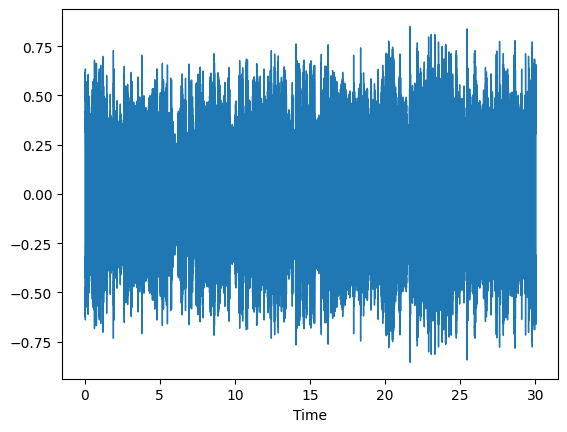

In [5]:
# List files in the rock genre directory
rock_files = os.listdir('genres/Data/genres_original/rock')
print(rock_files)  # This will print the names of your rock audio files

# Load a specific audio file (replace with actual file name)
audio_path = f'genres/Data/genres_original/rock/{rock_files[0]}'  # Using the first file as an example
y, sr = librosa.load(audio_path)

# Display the audio signal
import librosa.display
librosa.display.waveshow(y, sr=sr)


In [6]:
# Import necessary libraries
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt


In [7]:
# List the genre directories
genre_dirs = os.listdir('genres/Data/genres_original')
print(genre_dirs)


['disco', 'country', 'metal', 'rock', 'pop', 'hiphop', 'blues', 'classical', 'reggae', 'jazz']


In [8]:
# List files in a specific genre (replace 'rock' with your desired genre)
selected_genre = 'rock'  # Change this to the genre you want to explore
genre_files = os.listdir(f'genres/Data/genres_original/{selected_genre}')
print(genre_files)  # Print the audio files in the selected genre


['rock.00029.wav', 'rock.00081.wav', 'rock.00055.wav', 'rock.00095.wav', 'rock.00009.wav', 'rock.00018.wav', 'rock.00006.wav', 'rock.00026.wav', 'rock.00034.wav', 'rock.00078.wav', 'rock.00073.wav', 'rock.00040.wav', 'rock.00031.wav', 'rock.00076.wav', 'rock.00045.wav', 'rock.00035.wav', 'rock.00004.wav', 'rock.00007.wav', 'rock.00070.wav', 'rock.00024.wav', 'rock.00037.wav', 'rock.00059.wav', 'rock.00091.wav', 'rock.00008.wav', 'rock.00065.wav', 'rock.00083.wav', 'rock.00056.wav', 'rock.00025.wav', 'rock.00013.wav', 'rock.00061.wav', 'rock.00069.wav', 'rock.00068.wav', 'rock.00049.wav', 'rock.00080.wav', 'rock.00012.wav', 'rock.00077.wav', 'rock.00090.wav', 'rock.00054.wav', 'rock.00027.wav', 'rock.00060.wav', 'rock.00088.wav', 'rock.00043.wav', 'rock.00094.wav', 'rock.00021.wav', 'rock.00085.wav', 'rock.00019.wav', 'rock.00071.wav', 'rock.00032.wav', 'rock.00074.wav', 'rock.00038.wav', 'rock.00002.wav', 'rock.00082.wav', 'rock.00010.wav', 'rock.00016.wav', 'rock.00015.wav', 'rock.000

In [9]:
# Load a specific audio file (replace 'your_audio_file.wav' with the actual file name)
audio_file = genre_files[0]  # You can choose any file from the list
audio_path = f'genres/Data/genres_original/{selected_genre}/{audio_file}'

# Load the audio file
y, sr = librosa.load(audio_path)


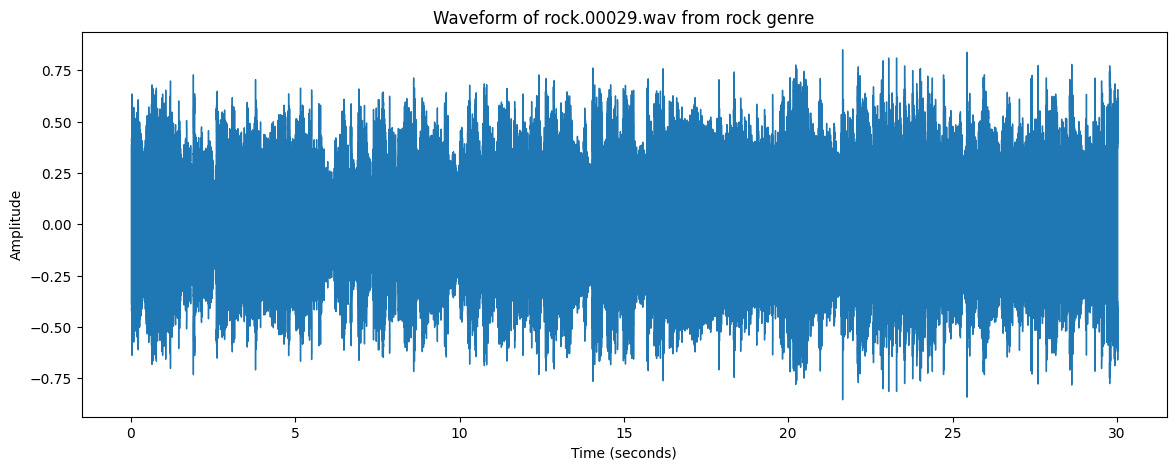

In [10]:
# Display the audio signal
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title(f'Waveform of {audio_file} from {selected_genre} genre')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()


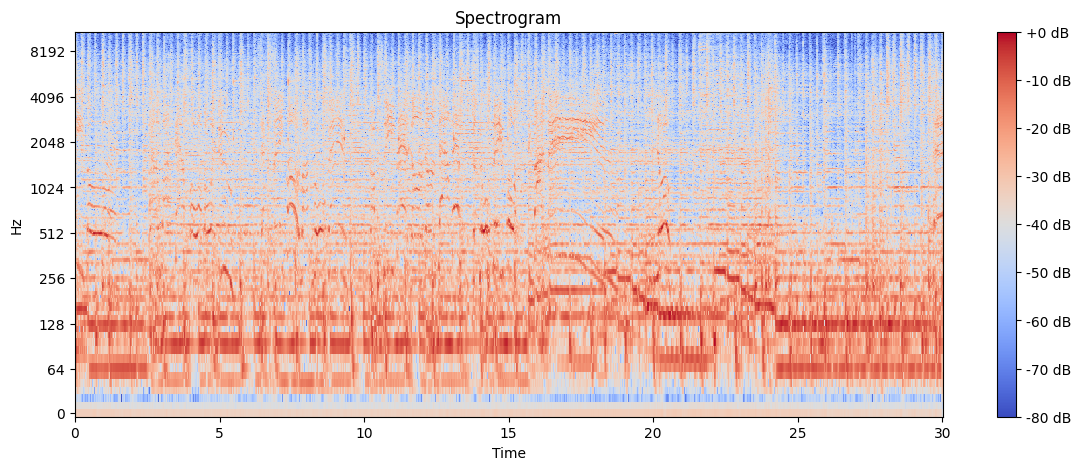

In [11]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='coolwarm')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()


In [12]:
!pip install soundfile audioread


In [13]:
import librosa

def extract_features(file_path):
    try:
        # Load the audio file using audioread
        y, sr = librosa.load(file_path, sr=None, backend='audioread')
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfccs_mean = np.mean(mfccs.T, axis=0)
        return mfccs_mean
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


In [14]:
def extract_features(file_path):
    try:
        # Attempt to load the audio file
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfccs_mean = np.mean(mfccs.T, axis=0)
        return mfccs_mean
    except (LibsndfileError, NoBackendError) as e:
        print(f"Error processing {file_path} with PySoundFile: {e}. Trying audioread...")
        try:
            # Try loading the audio file using audioread
            y, sr = librosa.load(file_path, sr=None, backend='audioread')
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
            mfccs_mean = np.mean(mfccs.T, axis=0)
            return mfccs_mean
        except Exception as e:
            print(f"Error processing {file_path} with audioread: {e}")
            return None


In [15]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [16]:
import librosa

def extract_features(file_path):
    try:
        # Load the audio file (no need to specify the backend)
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfccs_mean = np.mean(mfccs.T, axis=0)
        return mfccs_mean
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


In [17]:
import os
import numpy as np

# Path to the directory containing genres
genres_dir = 'genres/Data/genres_original'

# Initialize empty lists to store features and labels
features = []
labels = []

# Iterate over each genre folder
for genre in os.listdir(genres_dir):
    genre_dir = os.path.join(genres_dir, genre)
    if os.path.isdir(genre_dir):
        # Iterate over each file in the genre directory
        for file_name in os.listdir(genre_dir):
            file_path = os.path.join(genre_dir, file_name)
            # Extract features for each file
            mfccs = extract_features(file_path)
            if mfccs is not None:
                features.append(mfccs)
                labels.append(genre)

# Convert features and labels into numpy arrays
features = np.array(features)
labels = np.array(labels)


<ipython-input-16-b8c4a0e2c46a>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing genres/Data/genres_original/jazz/jazz.00054.wav: 


In [31]:
from sklearn.preprocessing import LabelEncoder

# Encode the genre labels as integers
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Check mapping of genre labels to numerical values
print(dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))


{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}


In [19]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (799, 13)
Testing data shape: (200, 13)


In [20]:
# Initialize the classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:
# Make predictions
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

       blues       0.71      0.71      0.71        17
   classical       0.95      0.95      0.95        20
     country       0.31      0.42      0.36        12
       disco       0.53      0.43      0.47        21
      hiphop       0.47      0.29      0.36        28
        jazz       0.46      0.63      0.53        19
       metal       0.86      0.79      0.83        24
         pop       0.48      0.73      0.58        15
      reggae       0.42      0.45      0.43        22
        rock       0.50      0.41      0.45        22

    accuracy                           0.57       200
   macro avg       0.57      0.58      0.57       200
weighted avg       0.58      0.57      0.57       200

Model Accuracy: 57.00%


In [22]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'music_genre_classifier.joblib')


['music_genre_classifier.joblib']

In [23]:
# Load the model from the file
loaded_model = joblib.load('music_genre_classifier.joblib')


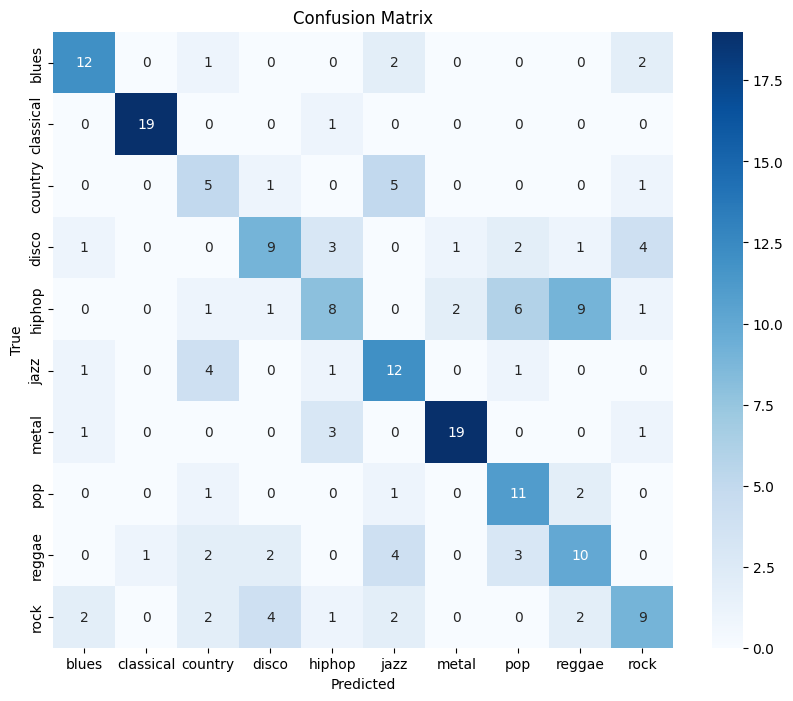

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [42]:
from ipywidgets import FileUpload, Button, Output, VBox
import numpy as np
import librosa
from sklearn.metrics import classification_report, accuracy_score
import joblib
from IPython.display import display

# Load your trained model
clf = joblib.load('music_genre_classifier.joblib')

# Genre mapping based on your model
genre_mapping = {
    0: 'blues',
    1: 'classical',
    2: 'country',
    3: 'disco',
    4: 'hiphop',
    5: 'jazz',
    6: 'metal',
    7: 'pop',
    8: 'reggae',
    9: 'rock'
}

# Initialize the output widget
output = Output()
upload = FileUpload(accept='.wav', multiple=False)
button_predict = Button(description="Predict Genre")

# Function to extract features from the audio file
def extract_features(file_content):
    audio_file = list(file_content.values())[0]['content']
    with open('temp_audio.wav', 'wb') as f:
        f.write(audio_file)

    try:
        y, sr = librosa.load('temp_audio.wav', sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfccs_mean = np.mean(mfccs.T, axis=0)
        return mfccs_mean
    except Exception as e:
        print(f"Error processing audio: {e}")
        return None

# Function to predict the genre of the audio file
def predict_genre(file_content):
    features = extract_features(file_content)
    if features is not None:
        features = np.array(features).reshape(1, -1)
        genre_index = clf.predict(features)[0]
        genre_name = genre_mapping.get(genre_index, "Unknown Genre")
        return genre_name, genre_index
    else:
        return "Error extracting features.", None

def on_predict_click(b):
    with output:
        output.clear_output()  # Clear previous output
        if upload.value:
            # Get the filename and the associated metadata
            for filename, file_info in upload.value.items():
                # Extract genre from the filename, stripping any unwanted characters
                true_genre = filename.split('_')[0].split('.')[0]  # Split on '_' and then on '.' to isolate the genre
                true_index = next((index for index, genre in genre_mapping.items() if genre == true_genre), None)

                # Check if the true_index was found
                if true_index is None:
                    print(f"Error: True genre '{true_genre}' not found in genre mapping.")
                    return

                # Predict the genre
                predicted_genre, genre_index = predict_genre(upload.value)

                if genre_index is not None:
                    # Display the predicted genre
                    print(f"The predicted genre is: {predicted_genre} (Index: {genre_index})")

                    # Generating the classification report
                    dummy_true_labels = [true_index]  # True label for the uploaded genre
                    dummy_predicted_labels = [genre_index]  # Predicted label

                    # Print debug information
                    print(f"True Label Index: {true_index}, Predicted Label Index: {genre_index}")

                    report = classification_report(
                        dummy_true_labels,
                        dummy_predicted_labels,
                        labels=[true_index],  # Only use true label for the report
                        target_names=[genre_mapping[true_index]],
                        zero_division=0  # Handle division by zero
                    )
                    print("Aggregated Classification Report:")
                    print(report)

                    # Calculate accuracy manually (if needed)
                    accuracy = accuracy_score(dummy_true_labels, dummy_predicted_labels)
                    print(f"Model Accuracy: {accuracy * 100:.2f}%")
        else:
            print("Please upload an audio file.")


# Link the button click to the prediction function
button_predict.on_click(on_predict_click)

# Display the upload widget and button
display(VBox([upload, button_predict, output]))


In [44]:
import zipfile
import os

# Replace 'your_archive.zip' with the path to your zip file
zip_file_path = '/content/drive/My Drive/archive.zip'  # Update this path

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_files')  # Extract to a directory

# List the extracted files
extracted_files = os.listdir('/content/extracted_files')
print(extracted_files)


['Data']


In [46]:
import pandas as pd

# Load the CSV files
features_3_sec = pd.read_csv('/content/extracted_files/Data/features_3_sec.csv')
features_30_sec = pd.read_csv('/content/extracted_files/Data/features_30_sec.csv')

# Display the first few rows of the dataframes
print(features_3_sec.head())
print(features_30_sec.head())


            filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.05

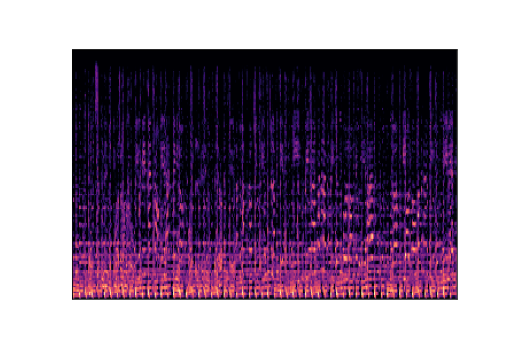

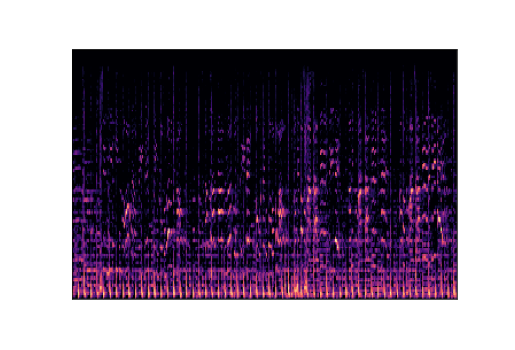

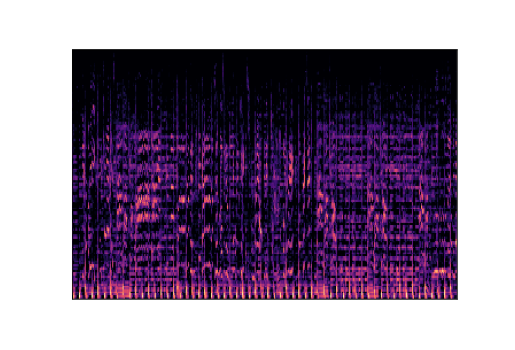

In [49]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the images directory
images_path = '/content/extracted_files/Data/images_original'

# List the files and directories
image_files = os.listdir(images_path)

# Display the first few images from the subdirectories
count = 0
for root, dirs, files in os.walk(images_path):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):  # Check for image file types
            img_path = os.path.join(root, file)
            img = Image.open(img_path)
            plt.imshow(img)
            plt.axis('off')  # Hide axis
            plt.show()
            count += 1
        if count == 3:  # Stop after displaying 3 images
            break
    if count == 3:
        break

